In [14]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from astropy import units as u
import read_reports as rr
import os
import Differentiated_Body_Composition_Tracker as dbct
import matplotlib.patches as mpatches

sol_to_earth = 332946.078

In [15]:
m_pl = 2.793176e-08 * sol_to_earth
m_emb = 2.793176e-07 * sol_to_earth
min_frag_mass = 0.5 * m_pl

min_ejecta_core_frac = 0.0
max_ejecta_core_frac = 1.0

for i in range(1,8):
    base_path = f'/home/tajer.1/rebound/examples/han_{i}/'
    collision_file = base_path + "collision_report.txt"
    comp_input_file = base_path + "dbct_input.txt"
    ejec_file = base_path + "ejections.txt"

    comp_output_file = f"haniyeh_output/han_output_{i}.txt"

    dbct.write_output(dbct.track_composition(collision_file, comp_input_file, ejec_file, min_ejecta_core_frac, max_ejecta_core_frac), comp_output_file)

In [16]:
base_dir = '/home/tajer.1/rebound/examples'
vi_vesc_dict = {}
b_bcrit_dict = {}

# Loop through directories and process slurm files
for i in range(1, 8):
    dir_path = os.path.join(base_dir, f'han_{i}')
    slurm_file = next((f for f in os.listdir(dir_path) if f.startswith('slurm')), None)
    if slurm_file:
        slurm_name = os.path.join(dir_path, slurm_file)
        vi_vesc_dict[f'han_{i}'], b_bcrit_dict[f'han_{i}'] = rr.extract_data_impact(slurm_name)

vi_vesc_df = pd.DataFrame.from_dict(vi_vesc_dict, orient='index').T
b_bcrit_df = pd.DataFrame.from_dict(b_bcrit_dict, orient='index').T

In [17]:
''' def find_repetitive_values(df, column_name):
    """
    Find repetitive values in a single column of a DataFrame.
    
    Parameters:
        df (pd.DataFrame): Input DataFrame to check.
        column_name (str): The name of the column to search for duplicates.
        
    Returns:
        list: A list of tuples with each tuple containing the indices and the repetitive value.
    """
    # Get duplicates in the specified column
    duplicates = df[df.duplicated(subset=[column_name], keep=False)]
    
    # Group duplicates by their values and collect indices
    repetitive_values = []
    for value, group in duplicates.groupby(column_name):
        indices = group.index.tolist()
        repetitive_values.append((indices, value))
    
    return repetitive_values

df = t_df

repetitive = find_repetitive_values(df, 'haniyeh_1')
if repetitive:
    print("Repetitive values found:")
    for indices, value in repetitive:
        print(f"Value: {value}, Indices: {indices}")
else:
    print("No repetitive values found.")
'''

' def find_repetitive_values(df, column_name):\n    """\n    Find repetitive values in a single column of a DataFrame.\n    \n    Parameters:\n        df (pd.DataFrame): Input DataFrame to check.\n        column_name (str): The name of the column to search for duplicates.\n        \n    Returns:\n        list: A list of tuples with each tuple containing the indices and the repetitive value.\n    """\n    # Get duplicates in the specified column\n    duplicates = df[df.duplicated(subset=[column_name], keep=False)]\n    \n    # Group duplicates by their values and collect indices\n    repetitive_values = []\n    for value, group in duplicates.groupby(column_name):\n        indices = group.index.tolist()\n        repetitive_values.append((indices, value))\n    \n    return repetitive_values\n\ndf = t_df\n\nrepetitive = find_repetitive_values(df, \'haniyeh_1\')\nif repetitive:\n    print("Repetitive values found:")\n    for indices, value in repetitive:\n        print(f"Value: {value}, Ind

In [18]:
# Initialize dictionaries to store data
t_dict = {}
type_dict = {}
b_dict = {}
hash_t_dict = {}
m_t_dict = {}
r_t_dict = {}
hash_p_dict = {}
r_p_dict = {}

usecols = range(8)

# Loop through file names and process each one
for i in range(1, 8):
    file_name = f'/home/tajer.1/rebound/examples/han_{i}/collision_report.txt'
    
    # Read the data and try to preserve the format by specifying the dtype
    data = np.loadtxt(file_name, usecols=usecols)
    
    # Save the   data into dictionaries
    t_dict[f'han_{i}'] =  data[:, 0]
    type_dict[f'han_{i}'] =  data[:, 1]
    b_dict[f'han_{i}'] =  data[:, 2]
    hash_t_dict[f'han_{i}'] =  data[:, 3]
    m_t_dict[f'han_{i}'] =  data[:, 4]
    r_t_dict[f'han_{i}'] =  data[:, 5]
    hash_p_dict[f'han_{i}'] =  data[:, 6]
    r_p_dict[f'han_{i}'] =  data[:, 7]
    


# Create DataFrames and align columns by filling with NaN
t_df = pd.DataFrame.from_dict(t_dict, orient='index').T
type_df = pd.DataFrame.from_dict(type_dict, orient='index').T
b_df = pd.DataFrame.from_dict(b_dict, orient='index').T
hash_t_df = pd.DataFrame.from_dict(hash_t_dict, orient='index').T
m_t_df = pd.DataFrame.from_dict(m_t_dict, orient='index').T
r_t_df = pd.DataFrame.from_dict(r_t_dict, orient='index').T
hash_p_df = pd.DataFrame.from_dict(hash_p_dict, orient='index').T
r_p_df = pd.DataFrame.from_dict(r_p_dict, orient='index').T


In [19]:
# Initialize dictionaries to store data
hash_dict = {}
mass_dict = {}
cmf_dict = {}

# Loop through file names and process each one
for i in range(1, 8):
    file_name = f'/home/tajer.1/planetgarten/DBCT/haniyeh_output/han_output_{i}.txt'
    #file_name = '/home/tajer.1/planetgarten/DBCT/DBCT_output/DBCT_output.txt'
    # Load the data
    data = np.loadtxt(file_name)
    
    # Extract columns
    hash_dict[f'han_{i}'] = data[:, 0]
    mass_dict[f'han_{i}'] = data[:, 1]
    cmf_dict[f'han_{i}'] = data[:, 2]

# Create DataFrames and align columns by filling with NaN
hash_df = pd.DataFrame.from_dict(hash_dict, orient='index').T
mass_df = pd.DataFrame.from_dict(mass_dict, orient='index').T
cmf_df = pd.DataFrame.from_dict(cmf_dict, orient='index').T


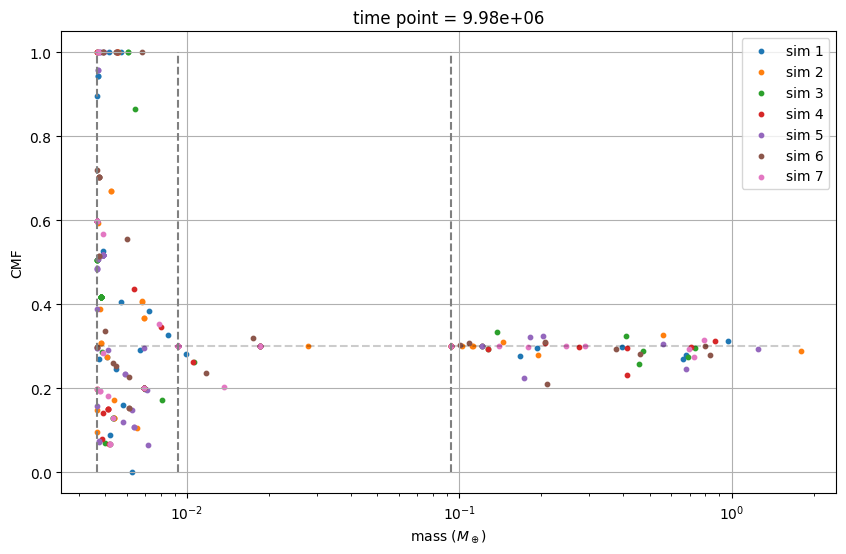

In [41]:
plt.figure(figsize=(10,6))

#for i in range(0,10):
for i in range(0,7):
    plt.scatter(mass_df[f'han_{i+1}']*sol_to_earth, cmf_df[f'han_{i+1}'], s = 10, label = f'sim {i+1}')

plt.plot([np.min(mass_df)*sol_to_earth, np.max(mass_df)*sol_to_earth], [0.3, 0.3], alpha = 0.2, color = 'black', linestyle = '--')

plt.plot([m_pl, m_pl], [0, 1], ls = '--', color='grey')
plt.plot([m_emb, m_emb], [0, 1], ls = '--', color='grey')
plt.plot([min_frag_mass, min_frag_mass], [0, 1], ls = '--', color='grey')

plt.legend()
plt.xlabel(r'mass ($M_\oplus$)')
plt.ylabel('CMF')
plt.grid(True)
plt.xscale('log')
plt.title(f'time point = {np.max(t_df):.2e}')

plt.show()

In [22]:
# Initialize shapes DataFrame with the same shape as type_df
shapes = pd.DataFrame(index=range(len(type_df['han_1'])), 
                      columns=[f'han_{i}' for i in range(1, 11)])

# Iterate through each column and row of type_df
for i in range(1, 8):  # Correct range to include han_10
    for j in range(len(type_df[f'han_{i}'])):
        if type_df.loc[j, f'han_{i}'] == 0:
            shapes.loc[j, f'han_{i}'] = 'o'
        elif type_df.loc[j, f'han_{i}'] == 1:
            shapes.loc[j, f'han_{i}'] = '*'
        elif type_df.loc[j, f'han_{i}'] == 2:
            shapes.loc[j, f'han_{i}'] = 'd'
        elif type_df.loc[j, f'han_{i}'] == 3:
            shapes.loc[j, f'han_{i}'] = 's'
        elif type_df.loc[j, f'han_{i}'] == 4:
            shapes.loc[j, f'han_{i}'] = '^'

In [23]:
run_1 = pd.DataFrame(index = range(len(t_df['han_1'])), columns=['t', 'm_t' , 'vi_vesc', 'b_bcrit', 'flag', 'label', 'color', 'shape'])

index = 0
for k in range(1,8):
    for i in range(0,len(t_df[f'han_{k}'])):
        if type_df.loc[i, f'han_{k}'] == 2:
            run_1.loc[index, 't'] = t_df.loc[i, f'han_{k}']
            run_1.loc[index, 'm_t'] = m_t_df.loc[i, f'han_{k}'] *sol_to_earth
            run_1.loc[index, 'vi_vesc'] = vi_vesc_df.loc[i, f'han_{k}']
            run_1.loc[index, 'b_bcrit'] = b_bcrit_df.loc[i, f'han_{k}']
            run_1.loc[index, 'flag'] = type_df.loc[i, f'han_{k}']
            run_1.loc[index, 'label'] = 'Accretive Collision'
            run_1.loc[index, 'color'] = 'blue'
            run_1.loc[index, 'shape'] = 'd'
            index += 1
        
        if (type_df.loc[i, f'han_{k}'] == 3) or (type_df.loc[i, f'han_{k}'] == 4):
            run_1.loc[index, 't'] = t_df.loc[i, f'han_{k}']
            run_1.loc[index, 'm_t'] = m_t_df.loc[i, f'han_{k}'] *sol_to_earth
            run_1.loc[index, 'vi_vesc'] = vi_vesc_df.loc[i, f'han_{k}']
            run_1.loc[index, 'b_bcrit'] = b_bcrit_df.loc[i, f'han_{k}']
            run_1.loc[index, 'flag'] = type_df.loc[i, f'han_{k}']
            run_1.loc[index, 'label'] = 'Erosive Collision'
            run_1.loc[index, 'color'] = 'orange'
            run_1.loc[index, 'shape'] = 's'
            index += 1


run_1 = run_1.dropna()


In [24]:
vi_vesc_df

,han_1,han_2,han_3,han_4,han_5,han_6,han_7
0,1.0115,1.0089,1.0092,0.9947,1.0228,1.0069,0.9998
1,1.0176,1.0354,0.9942,1.0166,1.0101,1.0616,1.0305
2,1.0127,1.3742,1.0245,0.9974,1.0259,1.0279,0.9955
3,1.0516,1.0492,1.0196,1.0300,1.0268,1.0599,1.1258
4,1.0577,1.0213,1.1010,1.0185,1.0253,1.0347,1.0433
...,...,...,...,...,...,...,...
560,NaN,NaN,NaN,NaN,8.3480,NaN,NaN
561,NaN,NaN,NaN,NaN,2.3846,NaN,NaN
562,NaN,NaN,NaN,NaN,2.1577,NaN,NaN
563,NaN,NaN,NaN,NaN,15.7516,NaN,NaN


Text(0.5, 1.0, 'time point = 9.98e+06')

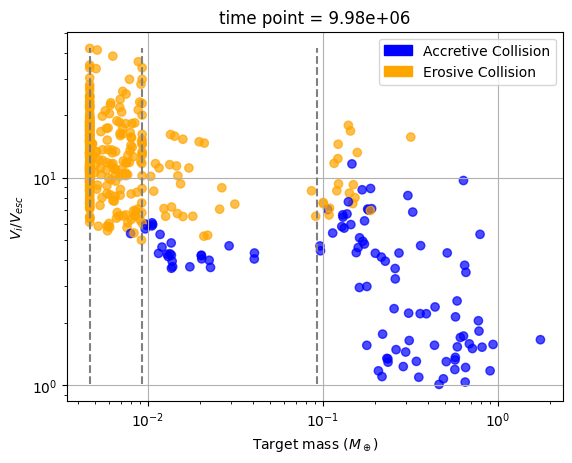

In [25]:


plt.scatter(run_1['m_t'], run_1['vi_vesc'],  color = run_1['color'], alpha=0.7)
plt.grid(True)

blue_patch = mpatches.Patch(color='blue', label='Accretive Collision')
orange_patch = mpatches.Patch(color='orange', label='Erosive Collision')

plt.plot([m_pl, m_pl], [np.min(run_1['vi_vesc']), np.max(run_1['vi_vesc'])], ls = '--', color='grey')
plt.plot([m_emb, m_emb], [np.min(run_1['vi_vesc']), np.max(run_1['vi_vesc'])], ls = '--', color='grey')
plt.plot([min_frag_mass, min_frag_mass], [np.min(run_1['vi_vesc']), np.max(run_1['vi_vesc'])], ls = '--', color='grey')

plt.legend(handles=[blue_patch, orange_patch])
plt.xlabel(r'Target mass ($M_\oplus$)')
plt.ylabel(r'$V_{i}/V_{esc}$')
plt.xscale('log')
plt.yscale('log')

plt.title(f'time point = {np.max(t_df):.2e}')

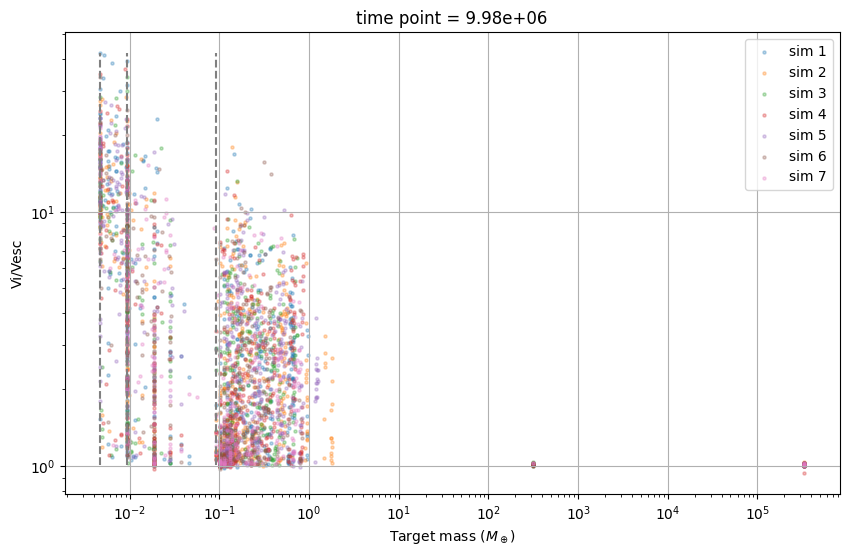

In [28]:
plt.figure(figsize=(10,6))

#for i in range(0,10):
for i in range(0,7):
    plt.scatter(m_t_df[f'han_{i+1}']*sol_to_earth, vi_vesc_df[f'han_{i+1}'], s = 5, label = f'sim {i+1}', alpha=0.3)

plt.plot([m_pl, m_pl], [np.min(run_1['vi_vesc']), np.max(run_1['vi_vesc'])], ls = '--', color='grey')
plt.plot([m_emb, m_emb], [np.min(run_1['vi_vesc']), np.max(run_1['vi_vesc'])], ls = '--', color='grey')
plt.plot([min_frag_mass, min_frag_mass], [np.min(run_1['vi_vesc']), np.max(run_1['vi_vesc'])], ls = '--', color='grey')

plt.legend()
plt.xlabel(r'Target mass ($M_\oplus$)')
plt.ylabel('Vi/Vesc')
plt.grid(True)
plt.xscale('log')
plt.yscale('log')
plt.title(f'time point = {np.max(t_df):.2e}')

plt.show()

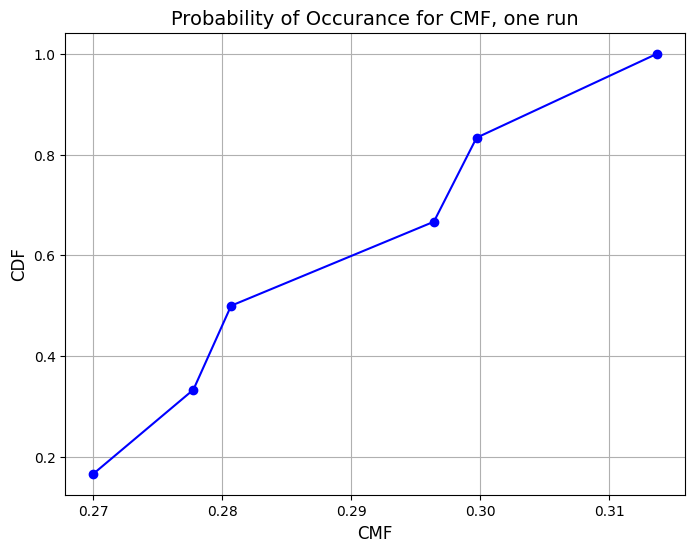

In [37]:
# Extract the data column
m_temp = mass_df['han_1']
indexes = m_temp.index[m_temp * sol_to_earth > 0.093].tolist()
data = cmf_df.loc[indexes, 'han_1']

# Sort the data
sorted_data = np.sort(data)

# Compute cumulative probability
cumulative_prob = np.arange(1, len(sorted_data) + 1) / len(sorted_data)

# Plot the cumulative distribution
plt.figure(figsize=(8, 6))
plt.plot(sorted_data, cumulative_prob, marker='o', color='blue')

# Add labels and grid
plt.title('Probability of Occurance for CMF, one run', fontsize=14)
plt.xlabel('CMF', fontsize=12)
plt.ylabel('CDF', fontsize=12)
plt.grid(True)

# Show the plot
plt.show()
